# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Solomon Stevens
### [GitHub Repository](https://github.com/Stone-Snevets/web-07-final)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### Question 1
Find on the internet [an article](https://techinspection.net/pros-and-cons-of-self-driving-cars/#:~:text=Self-driving%20cars%20could%20provide%20major%20benefits%20like%20increased,to%20jobs%2C%20liability%20laws%2C%20cybersecurity%2C%20costs%2C%20and%20more.) or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [3]:
# Article about the pros and cons of self-driving cars

# Imports
from bs4 import BeautifulSoup
from collections import Counter
from spacytextblob.spacytextblob import SpacyTextBlob
import matplotlib.pyplot as plt
import pickle, requests, spacy

In [4]:
# Request the article
online_article = requests.get('https://techinspection.net/pros-and-cons-of-self-driving-cars/#:~:text=Self-driving%20cars%20could%20provide%20major%20benefits%20like%20increased,to%20jobs%2C%20liability%20laws%2C%20cybersecurity%2C%20costs%2C%20and%20more')

# Store the article's html text in a pickle file
with open('self-driving-cars_pros-cons.pkl', 'wb') as file:
    pickle.dump(online_article.text, file)

### Question 2
Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [5]:
# Read in article's html source from file
#-> Open the file for reading
with open('self-driving-cars_pros-cons.pkl', 'rb') as file:
    html_article = pickle.load(file)

#-> Parse for the html
soup = BeautifulSoup(html_article, 'html.parser')

# Do sentiment analysis
#-> Load a spaCy core
nlp = spacy.load('en_core_web_sm')

#-> Create a pipeline of spacytextblob
nlp.add_pipe('spacytextblob')

#-> Create an NLP document
doc = nlp(soup.get_text())

# Print the polarity score of the article
print(f'Polarity Score: \t {doc._.blob.polarity:.2f}')

# Print the number of sentences in the article
print(f'Number of Sentences: \t {len(list(doc.sents))}')

Polarity Score: 	 0.17
Number of Sentences: 	 60


### Question 3
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [6]:
# Function to test if token is 'interesting'
#-> things not like 'a', 'the', ',', etc.
def is_token_interesting(token):
    return not(token.is_space or token.is_punct or token.is_stop)

In [7]:
# Grab a list of interesting tokens
#-> Convert them to all lowercase
interesting_tokens = [token.lower_ for token in doc if is_token_interesting(token)]

# Count up the frequency of each token
token_freq = Counter(map(str, interesting_tokens))

# Print the 5 most common tokens and their frequencies
print(token_freq.most_common(5))

[('driving', 36), ('cars', 29), ('self', 25), ('autonomous', 13), ('vehicles', 9)]


### Question 4
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [8]:
# Grab a list of interesting lemmas
#-> Again, convert them all to lowercase
interesting_lemmas = [token.lemma_.lower() for token in doc if is_token_interesting(token)]

# Count up the frequency of each lemma
lemma_freq = Counter(map(str, interesting_lemmas))

# Print the 5 most common lemmas and their frequencies
print(lemma_freq.most_common(5))

[('car', 31), ('drive', 30), ('self', 25), ('autonomous', 13), ('vehicle', 12)]


### Question 5
Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [9]:
# Function to return the token-sentence score
#-> (number of top 5 tokens in sentence) / (number of words in sentence)
def token_sentence_score(sentence, token_list):
    # Define some local variables
    num_words = 0
    num_top5 = 0
    
    # For each token in the sentence
    for token in sentence:
        # Check if the token is a punction mark or whitespace
        if not(token.is_space or token.is_punct):
            # If no, increment num_words
            num_words += 1

            # Check if that word is in the top 5 list
            if token.lower_ in token_list:
                # If yes, increment num_top5
                num_top5 += 1

    # Divide num_top5 by num_words
    #-> Cast one of them to a float for more precision
    #-> Return result
    return float(num_top5) / num_words

In [10]:
# Grab the tokens from our top 5 list
#-> Create an empty list
only_tokens = list()

#-> For each token, frequency combo
for token, freq in token_freq.most_common(5):
    # Grab only the token and append it to the list
    only_tokens.append(token)

# Create an empty list for our token scores
token_scores = list()
    
# For each sentence
for i in range(len(list(doc.sents))):
    # Calculate the token score for that sentence
    token_scores.append(token_sentence_score(list(doc.sents)[i], only_tokens))

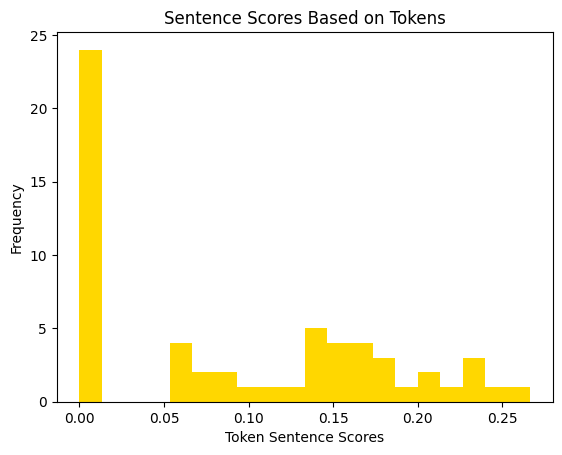

In [11]:
# Generate a histogram of our token sentence scores
#-> Define the number of bins
NUM_BINS = 20

#-> Plot the histogram
plt.hist(token_scores, NUM_BINS, color = 'gold')

#-> Add labels
plt.xlabel('Token Sentence Scores')
plt.ylabel('Frequency')
plt.title('Sentence Scores Based on Tokens')

#-> Display the graph
plt.show()

# Comment what seems to be the most common range
## As expected, there seem to be the most sentences with a token score of nearly (if not exactly) zero.
## There IS a nice group of scores above 0.05 though.

### Question 6
Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [16]:
# Function to return the lemma-sentence score
#-> (number of top 5 lemmas in sentence) / (number of words in sentence)
def lemma_sentence_score(sentence, lemma_list):
    # Define some local variables
    num_words = 0
    num_top5 = 0
    
    # For each token in the sentence
    for token in sentence:
        # Check if the token is a punction mark or whitespace
        if not(token.is_space or token.is_punct):
            # If no, increment num_words
            num_words += 1

            # Check if that word is in the top 5 list
            if token.lemma_.lower() in lemma:
                # If yes, increment num_top5
                num_top5 += 1

    # Divide num_top5 by num_words
    #-> Cast one of them to a float for more precision
    #-> Return result
    return float(num_top5) / num_words

In [17]:
# Grab the lemmas from our top 5 list
#-> Create an empty list
only_lemmas = list()

#-> For each lemma, frequency combo
for lemma, freq in lemma_freq.most_common(5):
    # Grab only the lemma and append it to the list
    only_lemmas.append(lemma)

# Create an empty list for our lemma scores
lemma_scores = list()
    
# For each sentence
for i in range(len(list(doc.sents))):
    # Calculate the lemma score for that sentence
    lemma_scores.append(lemma_sentence_score(list(doc.sents)[i], only_lemmas))

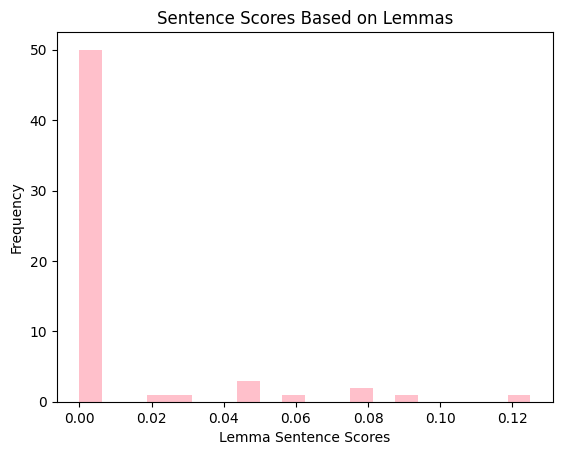

In [20]:
# Generate a histogram of our lemma sentence scores
#-> Define the number of bins
NUM_BINS = 20

#-> Plot the histogram
plt.hist(lemma_scores, NUM_BINS, color = 'pink')

#-> Add labels
plt.xlabel('Lemma Sentence Scores')
plt.ylabel('Frequency')
plt.title('Sentence Scores Based on Lemmas')

#-> Display the graph
plt.show()

# Comment what seems to be the most common range
## One can notice quite a bit of space between each bin on our histogram.
## This can be fixed by lowering the number of bins.
## Still, most scores are at or near zero again.

### Question 7
Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): `0.20`
* Cutoff Score (lemmas): `0.04`

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

### Question 8
Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 7.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [45]:
# Create an empty list
high_scoring_sentences = []

# Initialize the token cutoff point
TKN_CUTOFF = 0.20

# For each sentence
for i in range(len(list(doc.sents))):
    # If the token score is higher than the cutoff point
    if token_scores[i] > TKN_CUTOFF:
        # Append that sentence to our list
        high_scoring_sentences.append(list(doc.sents)[i].text.strip())

# Print our summary list
print('\n\n'.join(high_scoring_sentences))

Table of Contents
Toggle
Pros of Self-Driving CarsIncreased SafetyIncreased MobilityIncreased ProductivityReduced CongestionEnvironmental BenefitsCons of Self-Driving CarsLoss of Driving JobsLiability IssuesSoftware HackingHigh CostsConclusion
Self-driving cars, also known as autonomous vehicles, have the ability to operate without a human driver.

This article will overview the key advantages and difficulties facing self-driving cars.

The widespread adoption of self-driving cars can potentially reshape our world drastically.

But are we ready for cars that drive themselves?
Pros of Self-Driving Cars
Self-driving cars offer many potential benefits that could improve transportation and society in major ways.

Increased Productivity
Riders in self-driving cars won’t have to focus on driving themselves.

Widespread use of eco-friendly autonomous vehicles could reduce pollution and benefit the environment.
Cons of Self-Driving Cars
Despite their many advantages, self-driving cars also com

### Question 9
Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [51]:
# Add the list of sentences to the NLP pipeline
doc_high_scoring_sentences = nlp(' '.join(high_scoring_sentences))

# Print the polarity score of the summary
print('Polarity Score of Summary:\t', doc_high_scoring_sentences._.blob.polarity)

# Print the number of sentences in our summary
print('Number of Sentences in Summary:\t', len(high_scoring_sentences))

Polarity Score of Summary:	 0.2215909090909091
Number of Sentences in Summary:	 6


### Question 10
Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

### Question 11
Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

### Question 12
Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

### Question 13
Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?